
 Training Set Sample:
                                                  Text     Label
184  busting the 5 biggest job market myths in 2025...  Business
21   zuckerberg’s rightward policy shift puts meta ...  Business
122  top 5 emerging jobs shaping the future of work...  Business
39   gen z mental health crisis: 4 steps business l...  Business
72   musk says his new ai chatbot outperforms all r...      Tech

 Testing Set Sample:
                                                  Text     Label
57   gurobi ai modeling empowers users with accessi...      Tech
43   crypto, interest rates and ai: how to navigate...  Business
50   why ai usage may degrade human cognition and b...      Tech
133  a.i. buzzwords: top artificial intelligence ch...  Business
100  managing the future of work: microsoft’s ai pe...      Tech
 Classification Report:
              precision    recall  f1-score   support

    Business       0.62      0.38      0.48        13
   Education       1.00      0.67      0.8

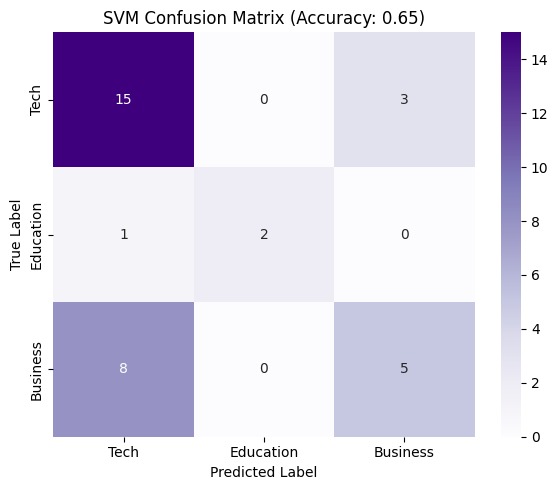

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Text Mining\Project\labeled_news_dataset.csv")
df['text'] = (df['Title'].fillna('') + ' ' + df['Description'].fillna('')).str.lower()
df['Label'] = 'Unknown'

df.loc[df['text'].str.contains("ai|machine learning|artificial intelligence|automation|robot", regex=True), 'Label'] = 'Tech'
df.loc[df['text'].str.contains("school|university|student|education|curriculum|graduates", regex=True), 'Label'] = 'Education'
df.loc[df['text'].str.contains("business|company|market|economy|industry|finance|startup", regex=True), 'Label'] = 'Business'

df = df[df['Label'] != 'Unknown']

X = df['text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print("\n Training Set Sample:")
print(pd.DataFrame({'Text': X_train, 'Label': y_train}).head(5))

print("\n Testing Set Sample:")
print(pd.DataFrame({'Text': X_test, 'Label': y_test}).head(5))


svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(kernel='linear', random_state=42))
])

svm_pipeline.fit(X_train, y_train)

y_pred_svm = svm_pipeline.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(" Classification Report:")
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm, labels=['Tech', 'Education', 'Business'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Tech', 'Education', 'Business'],
            yticklabels=['Tech', 'Education', 'Business'])
plt.title(f'SVM Confusion Matrix (Accuracy: {accuracy_svm:.2f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


 Training Set Sample:
                                                  Text     Label
184  busting the 5 biggest job market myths in 2025...  Business
21   zuckerberg’s rightward policy shift puts meta ...  Business
122  top 5 emerging jobs shaping the future of work...  Business
39   gen z mental health crisis: 4 steps business l...  Business
72   musk says his new ai chatbot outperforms all r...      Tech

 Testing Set Sample:
                                                  Text     Label
57   gurobi ai modeling empowers users with accessi...      Tech
43   crypto, interest rates and ai: how to navigate...  Business
50   why ai usage may degrade human cognition and b...      Tech
133  a.i. buzzwords: top artificial intelligence ch...  Business
100  managing the future of work: microsoft’s ai pe...      Tech

 Classification Report:
              precision    recall  f1-score   support

    Business       0.62      0.38      0.48        13
   Education       1.00      0.67      0.8

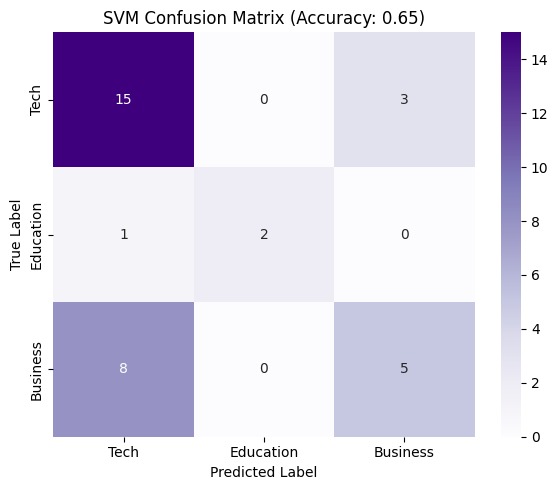

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Text Mining\Project\labeled_news_dataset.csv")  
df['text'] = (df['Title'].fillna('') + ' ' + df['Description'].fillna('')).str.lower()
df['Label'] = 'Unknown'
df.loc[df['text'].str.contains("ai|machine learning|artificial intelligence|automation|robot", regex=True), 'Label'] = 'Tech'
df.loc[df['text'].str.contains("school|university|student|education|curriculum|graduates", regex=True), 'Label'] = 'Education'
df.loc[df['text'].str.contains("business|company|market|economy|industry|finance|startup", regex=True), 'Label'] = 'Business'
df = df[df['Label'] != 'Unknown']

X = df['text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print(" Training Set Sample:")
print(pd.DataFrame({'Text': X_train, 'Label': y_train}).head())

print("\n Testing Set Sample:")
print(pd.DataFrame({'Text': X_test, 'Label': y_test}).head())

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(kernel='linear', random_state=42))
])

svm_pipeline.fit(X_train, y_train)

y_pred = svm_pipeline.predict(X_test)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\n SVM Model Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred, labels=['Tech', 'Education', 'Business'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Tech', 'Education', 'Business'],
            yticklabels=['Tech', 'Education', 'Business'])
plt.title(f'SVM Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


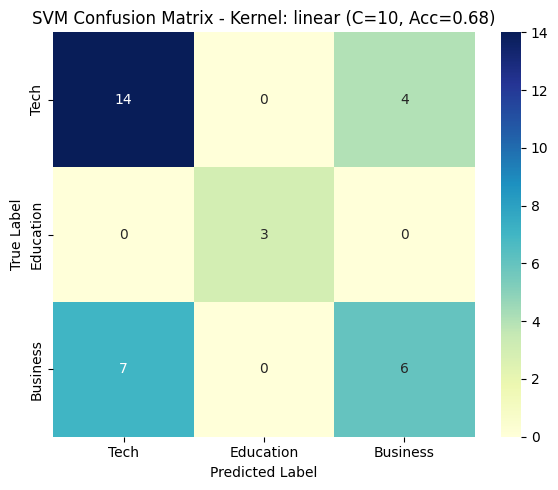

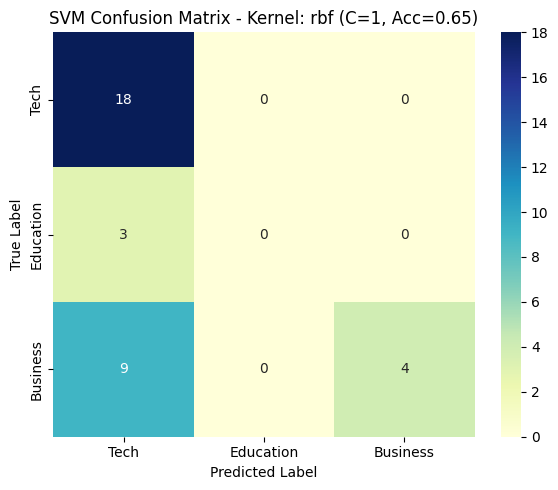

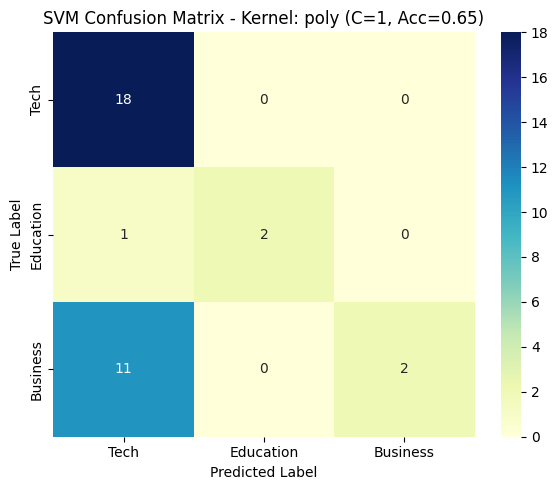

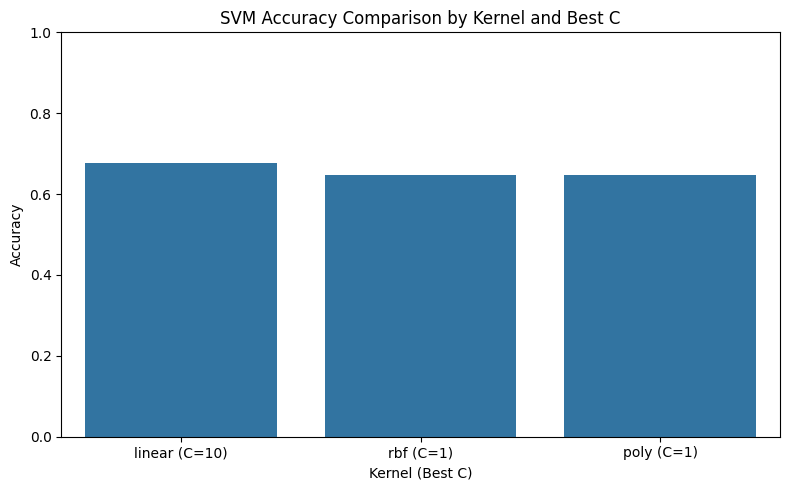


📋 Best Accuracy by Kernel:
Kernel: linear, Best C: 10, Accuracy: 0.68
Kernel: rbf, Best C: 1, Accuracy: 0.65
Kernel: poly, Best C: 1, Accuracy: 0.65


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Text Mining\Project\labeled_news_dataset.csv")
df['text'] = (df['Title'].fillna('') + ' ' + df['Description'].fillna('')).str.lower()

df['Label'] = 'Unknown'
df.loc[df['text'].str.contains("ai|machine learning|artificial intelligence|automation|robot", regex=True), 'Label'] = 'Tech'
df.loc[df['text'].str.contains("school|university|student|education|curriculum|graduates", regex=True), 'Label'] = 'Education'
df.loc[df['text'].str.contains("business|company|market|economy|industry|finance|startup", regex=True), 'Label'] = 'Business'
df = df[df['Label'] != 'Unknown']

X = df['text']
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

kernels = ['linear', 'rbf', 'poly']
costs = [0.1, 1, 10]
results = {}

for kernel in kernels:
    for C in costs:
        model = SVC(kernel=kernel, C=C, random_state=42)
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred, labels=['Tech', 'Education', 'Business'])
        results[(kernel, C)] = {
            'model': model,
            'accuracy': acc,
            'confusion_matrix': cm,
            'predictions': y_pred
        }

best_models = {}
for kernel in kernels:
    best_C = max([(C, results[(kernel, C)]['accuracy']) for C in costs], key=lambda x: x[1])[0]
    best_models[kernel] = {
        'C': best_C,
        'accuracy': results[(kernel, best_C)]['accuracy'],
        'confusion_matrix': results[(kernel, best_C)]['confusion_matrix']
    }

for kernel, data in best_models.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(data['confusion_matrix'], annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=['Tech', 'Education', 'Business'],
                yticklabels=['Tech', 'Education', 'Business'])
    plt.title(f'SVM Confusion Matrix - Kernel: {kernel} (C={data["C"]}, Acc={data["accuracy"]:.2f})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

kernel_labels = [f'{k} (C={best_models[k]["C"]})' for k in kernels]
accuracies = [best_models[k]['accuracy'] for k in kernels]

plt.figure(figsize=(8, 5))
sns.barplot(x=kernel_labels, y=accuracies)
plt.title('SVM Accuracy Comparison by Kernel and Best C')
plt.ylabel('Accuracy')
plt.xlabel('Kernel (Best C)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

print("\n📋 Best Accuracy by Kernel:")
for kernel, data in best_models.items():
    print(f"Kernel: {kernel}, Best C: {data['C']}, Accuracy: {data['accuracy']:.2f}")


📋 Sentiment Classification Report:
              precision    recall  f1-score   support

    Negative       0.42      0.33      0.37        15
     Neutral       0.46      0.50      0.48        12
    Positive       0.27      0.31      0.29        13

    accuracy                           0.38        40
   macro avg       0.38      0.38      0.38        40
weighted avg       0.38      0.38      0.38        40



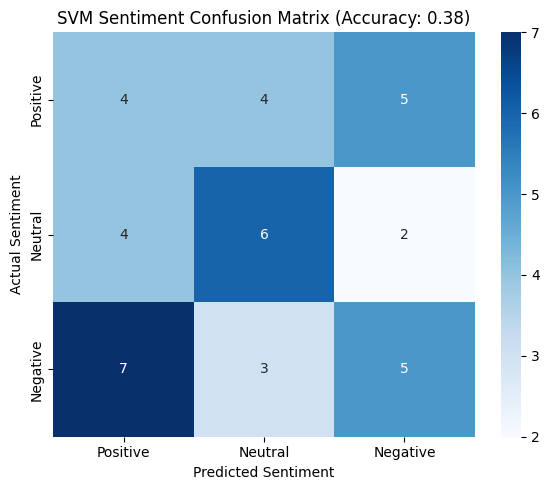

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Text Mining\Project\labeled_news_dataset.csv")  
df['text'] = (df['Title'].fillna('') + ' ' + df['Description'].fillna('')).str.lower()

np.random.seed(42)
df['Sentiment'] = np.random.choice(['Positive', 'Neutral', 'Negative'], size=len(df))

X = df['text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

svm_sentiment_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),        
    ('svm', SVC(kernel='linear', random_state=42)) 
])

svm_sentiment_pipeline.fit(X_train, y_train)

y_pred = svm_sentiment_pipeline.predict(X_test)

print("📋 Sentiment Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.title(f'SVM Sentiment Confusion Matrix (Accuracy: {accuracy_score(y_test, y_pred):.2f})')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.tight_layout()
plt.show()
